In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
Start_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
Stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

#Datasets

In [ ]:
Stroke.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [ ]:
Stroke.shape

(5110, 12)

In [ ]:
Stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
Stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


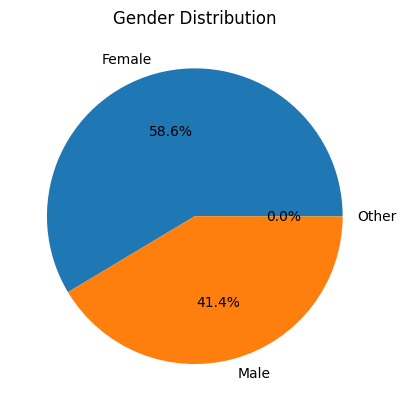

In [ ]:
#Gender Pie Chart
gender_counts = Stroke['gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

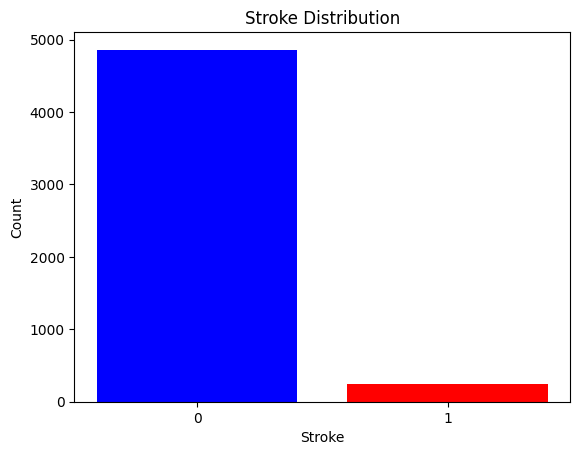

In [ ]:
#Stroke Bar Chart
stroke_counts = Stroke['stroke'].value_counts()
plt.bar(stroke_counts.index.astype(str), stroke_counts.values, color=['blue', 'red'])
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


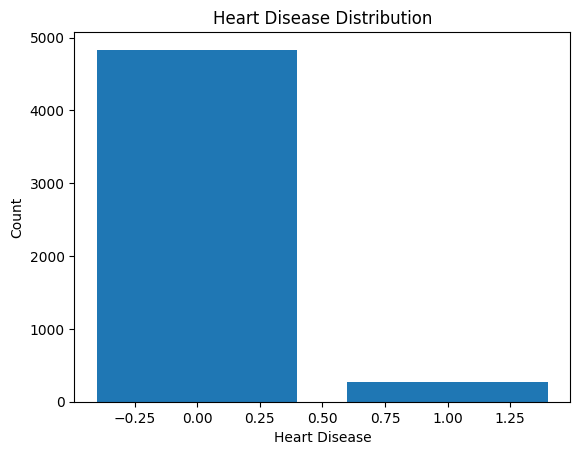

In [ ]:
#Heart Disease Bar Chart
heart_disease_counts = Stroke['heart_disease'].value_counts()
plt.bar(heart_disease_counts.index, heart_disease_counts.values)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


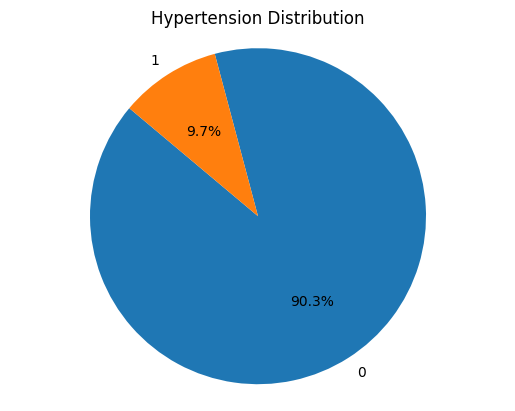

In [ ]:
#Pie Chart for Hypertension
hypertension_counts = Stroke['hypertension'].value_counts()
plt.pie(hypertension_counts, labels=hypertension_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Hypertension Distribution')
plt.axis('equal')
plt.show()


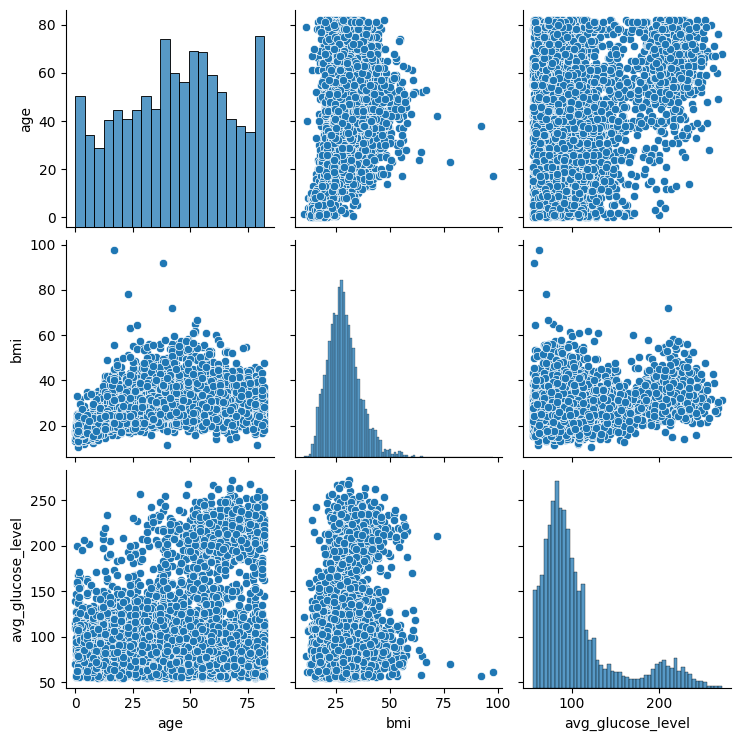

In [ ]:
scatter_data = Stroke[['age', 'bmi', 'avg_glucose_level']]
sns.pairplot(scatter_data)
plt.show()

#Pre-processing

In [ ]:
Stroke = Stroke.drop(['id'], axis = 1)

In [ ]:
Stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
Stroke['bmi'].fillna(Stroke['bmi'].mean(), inplace=True) #simple imputer

In [ ]:
Stroke['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [ ]:
Stroke['ever_married'] = Stroke['ever_married'].map({'Yes':1,'No':0})

In [ ]:
Stroke['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [ ]:
Stroke = Stroke[Stroke['gender'] != 'other'] #removing other value

In [ ]:
label_encoder = LabelEncoder()
Stroke['gender'] = label_encoder.fit_transform(Stroke['gender']) #male 1 female 0

In [ ]:
Stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
Stroke['work_type'].value_counts() #one hot encoding

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [ ]:
Stroke['Residence_type'].value_counts() #one hot encoding

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [ ]:
Stroke['smoking_status'].value_counts() #one hot encoding

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

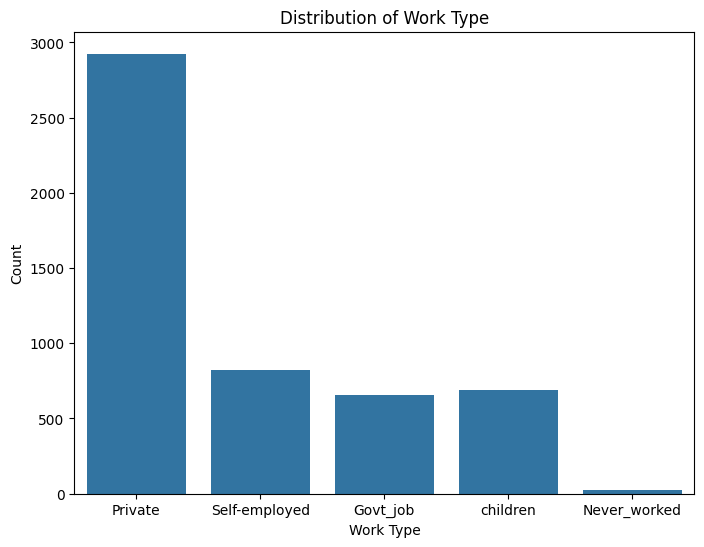

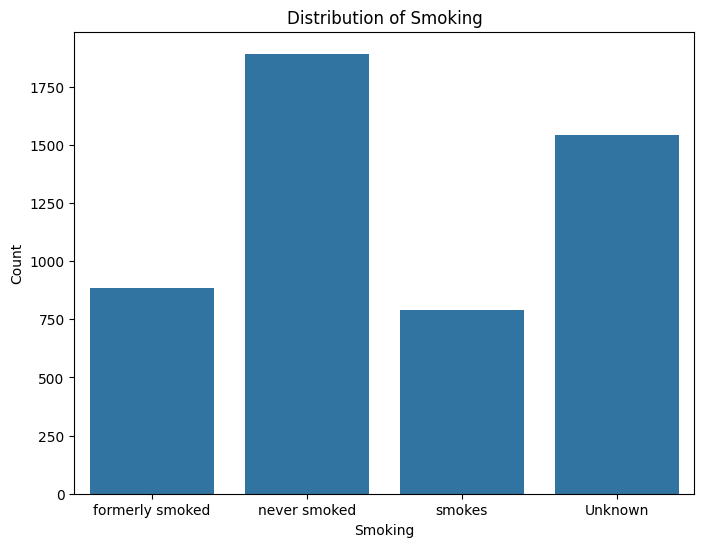

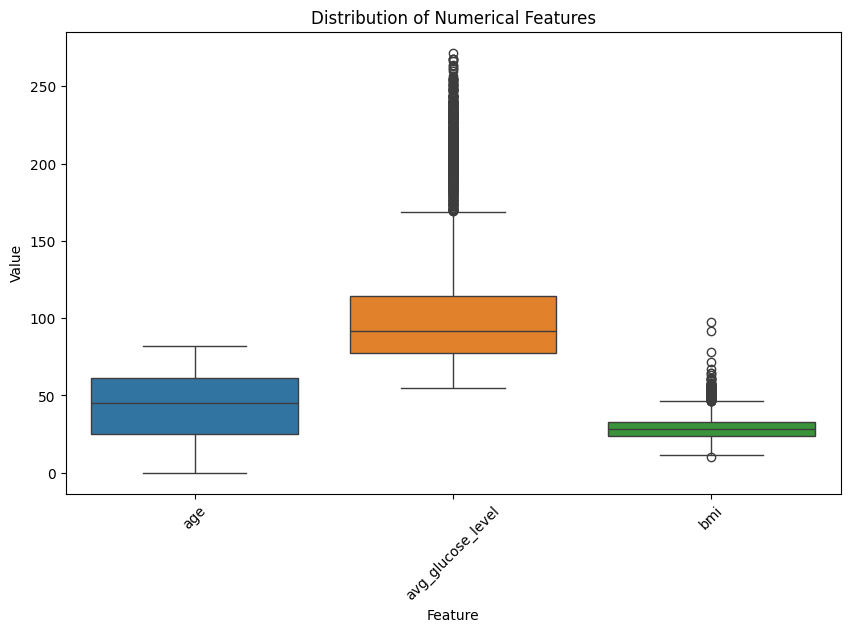

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of 'work_type'
plt.figure(figsize=(8, 6))
sns.countplot(data=Stroke, x='work_type')
plt.title('Distribution of Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

# Plot histogram of 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(data=Stroke, x='smoking_status')
plt.title('Distribution of Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

numerical_features = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(10, 6))
sns.boxplot(data=Stroke[numerical_features])
plt.title('Distribution of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()




In [ ]:
Stroke = pd.get_dummies(Stroke).astype(int)
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,228,36,1,0,0,1,0,0,0,1,0,1,0,0
1,0,61,0,0,1,202,28,1,0,0,0,1,0,1,0,0,0,1,0
2,1,80,0,1,1,105,32,1,0,0,1,0,0,1,0,0,0,1,0
3,0,49,0,0,1,171,34,1,0,0,1,0,0,0,1,0,0,0,1
4,0,79,1,0,1,174,24,1,0,0,0,1,0,1,0,0,0,1,0


#MODELS

**Logistic Regression:**

 Classification problems with binary or multiclass targets.

 **Random Forest:**

 Classification or regression problems with high-dimensional data or complex decision boundaries.

**K-Nearest Neighbors (KNN)**

KNN is effective for nonlinear relationships between features and the target variable since it makes no assumptions about the underlying data distribution.


In [ ]:
def run_classification_models(data, target_column):

    X = data.drop(columns=[target_column])
    y = data[target_column]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

    knn = KNeighborsClassifier()
    rf = RandomForestClassifier()
    lr = LogisticRegression(max_iter=10000)


    knn.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    lr.fit(X_train, y_train)

    knn_pred = knn.predict(X_test)
    rf_pred = rf.predict(X_test)
    lr_pred = lr.predict(X_test)


    knn_conf_matrix = confusion_matrix(y_test, knn_pred)
    rf_conf_matrix = confusion_matrix(y_test, rf_pred)
    lr_conf_matrix = confusion_matrix(y_test, lr_pred)


    knn_metrics = {
        'Accuracy': accuracy_score(y_test, knn_pred),
        'Precision': precision_score(y_test, knn_pred, zero_division=1),
        'Recall': recall_score(y_test, knn_pred),
        'F1 Score': f1_score(y_test, knn_pred),
        'Confusion Matrix': knn_conf_matrix
    }

    rf_metrics = {
        'Accuracy': accuracy_score(y_test, rf_pred),
        'Precision': precision_score(y_test, rf_pred, zero_division=1),
        'Recall': recall_score(y_test, rf_pred),
        'F1 Score': f1_score(y_test, rf_pred),
        'Confusion Matrix': rf_conf_matrix
    }

    lr_metrics = {
        'Accuracy': accuracy_score(y_test, lr_pred),
        'Precision': precision_score(y_test, lr_pred, zero_division=1),
        'Recall': recall_score(y_test, lr_pred),
        'F1 Score': f1_score(y_test, lr_pred),
        'Confusion Matrix': lr_conf_matrix
    }

    return {'KNN': {'model': knn, 'metrics': knn_metrics},
            'Random Forest': {'model': rf, 'metrics': rf_metrics},
            'Logistic Regression': {'model': lr, 'metrics': lr_metrics}}

def print_results(results):
    for model_name, model_data in results.items():
        print(f"Model: {model_name}")
        metrics = model_data['metrics']
        print("Metrics:")
        for metric_name, metric_value in metrics.items():
            if metric_name == 'Confusion Matrix':
                print(f"{metric_name}:")
                for row in metric_value:
                    print(row)
            else:
                print(f"{metric_name}: {metric_value:.4f}")
        print("\n")

#Optimization

In [ ]:
print_results(run_classification_models(Stroke,'stroke'))

Model: KNN
Metrics:
Accuracy: 0.9442
Precision: 0.1111
Recall: 0.0200
F1 Score: 0.0339
Confusion Matrix:
[964   8]
[49  1]


Model: Random Forest
Metrics:
Accuracy: 0.9491
Precision: 0.3333
Recall: 0.0400
F1 Score: 0.0714
Confusion Matrix:
[968   4]
[48  2]


Model: Logistic Regression
Metrics:
Accuracy: 0.9521
Precision: 1.0000
Recall: 0.0200
F1 Score: 0.0392
Confusion Matrix:
[972   0]
[49  1]




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['avg_glucose_level', 'bmi']
Stroke[features_to_scale] = scaler.fit_transform(Stroke[features_to_scale])

Stroke.head()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,2.702438,0.984566,1,0,0,1,0,0,0,1,0,1,0,0
1,0,61,0,0,1,2.128117,-0.056053,1,0,0,0,1,0,1,0,0,0,1,0
2,1,80,0,1,1,-0.014542,0.464257,1,0,0,1,0,0,1,0,0,0,1,0
3,0,49,0,0,1,1.443350,0.724412,1,0,0,1,0,0,0,1,0,0,0,1
4,0,79,1,0,1,1.509618,-0.576363,1,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
print_results(run_classification_models(Stroke,'stroke'))

Model: KNN
Metrics:
Accuracy: 0.9501
Precision: 0.4000
Recall: 0.0400
F1 Score: 0.0727
Confusion Matrix:
[969   3]
[48  2]


Model: Random Forest
Metrics:
Accuracy: 0.9501
Precision: 0.4000
Recall: 0.0400
F1 Score: 0.0727
Confusion Matrix:
[969   3]
[48  2]


Model: Logistic Regression
Metrics:
Accuracy: 0.9521
Precision: 1.0000
Recall: 0.0200
F1 Score: 0.0392
Confusion Matrix:
[972   0]
[49  1]




<Axes: >

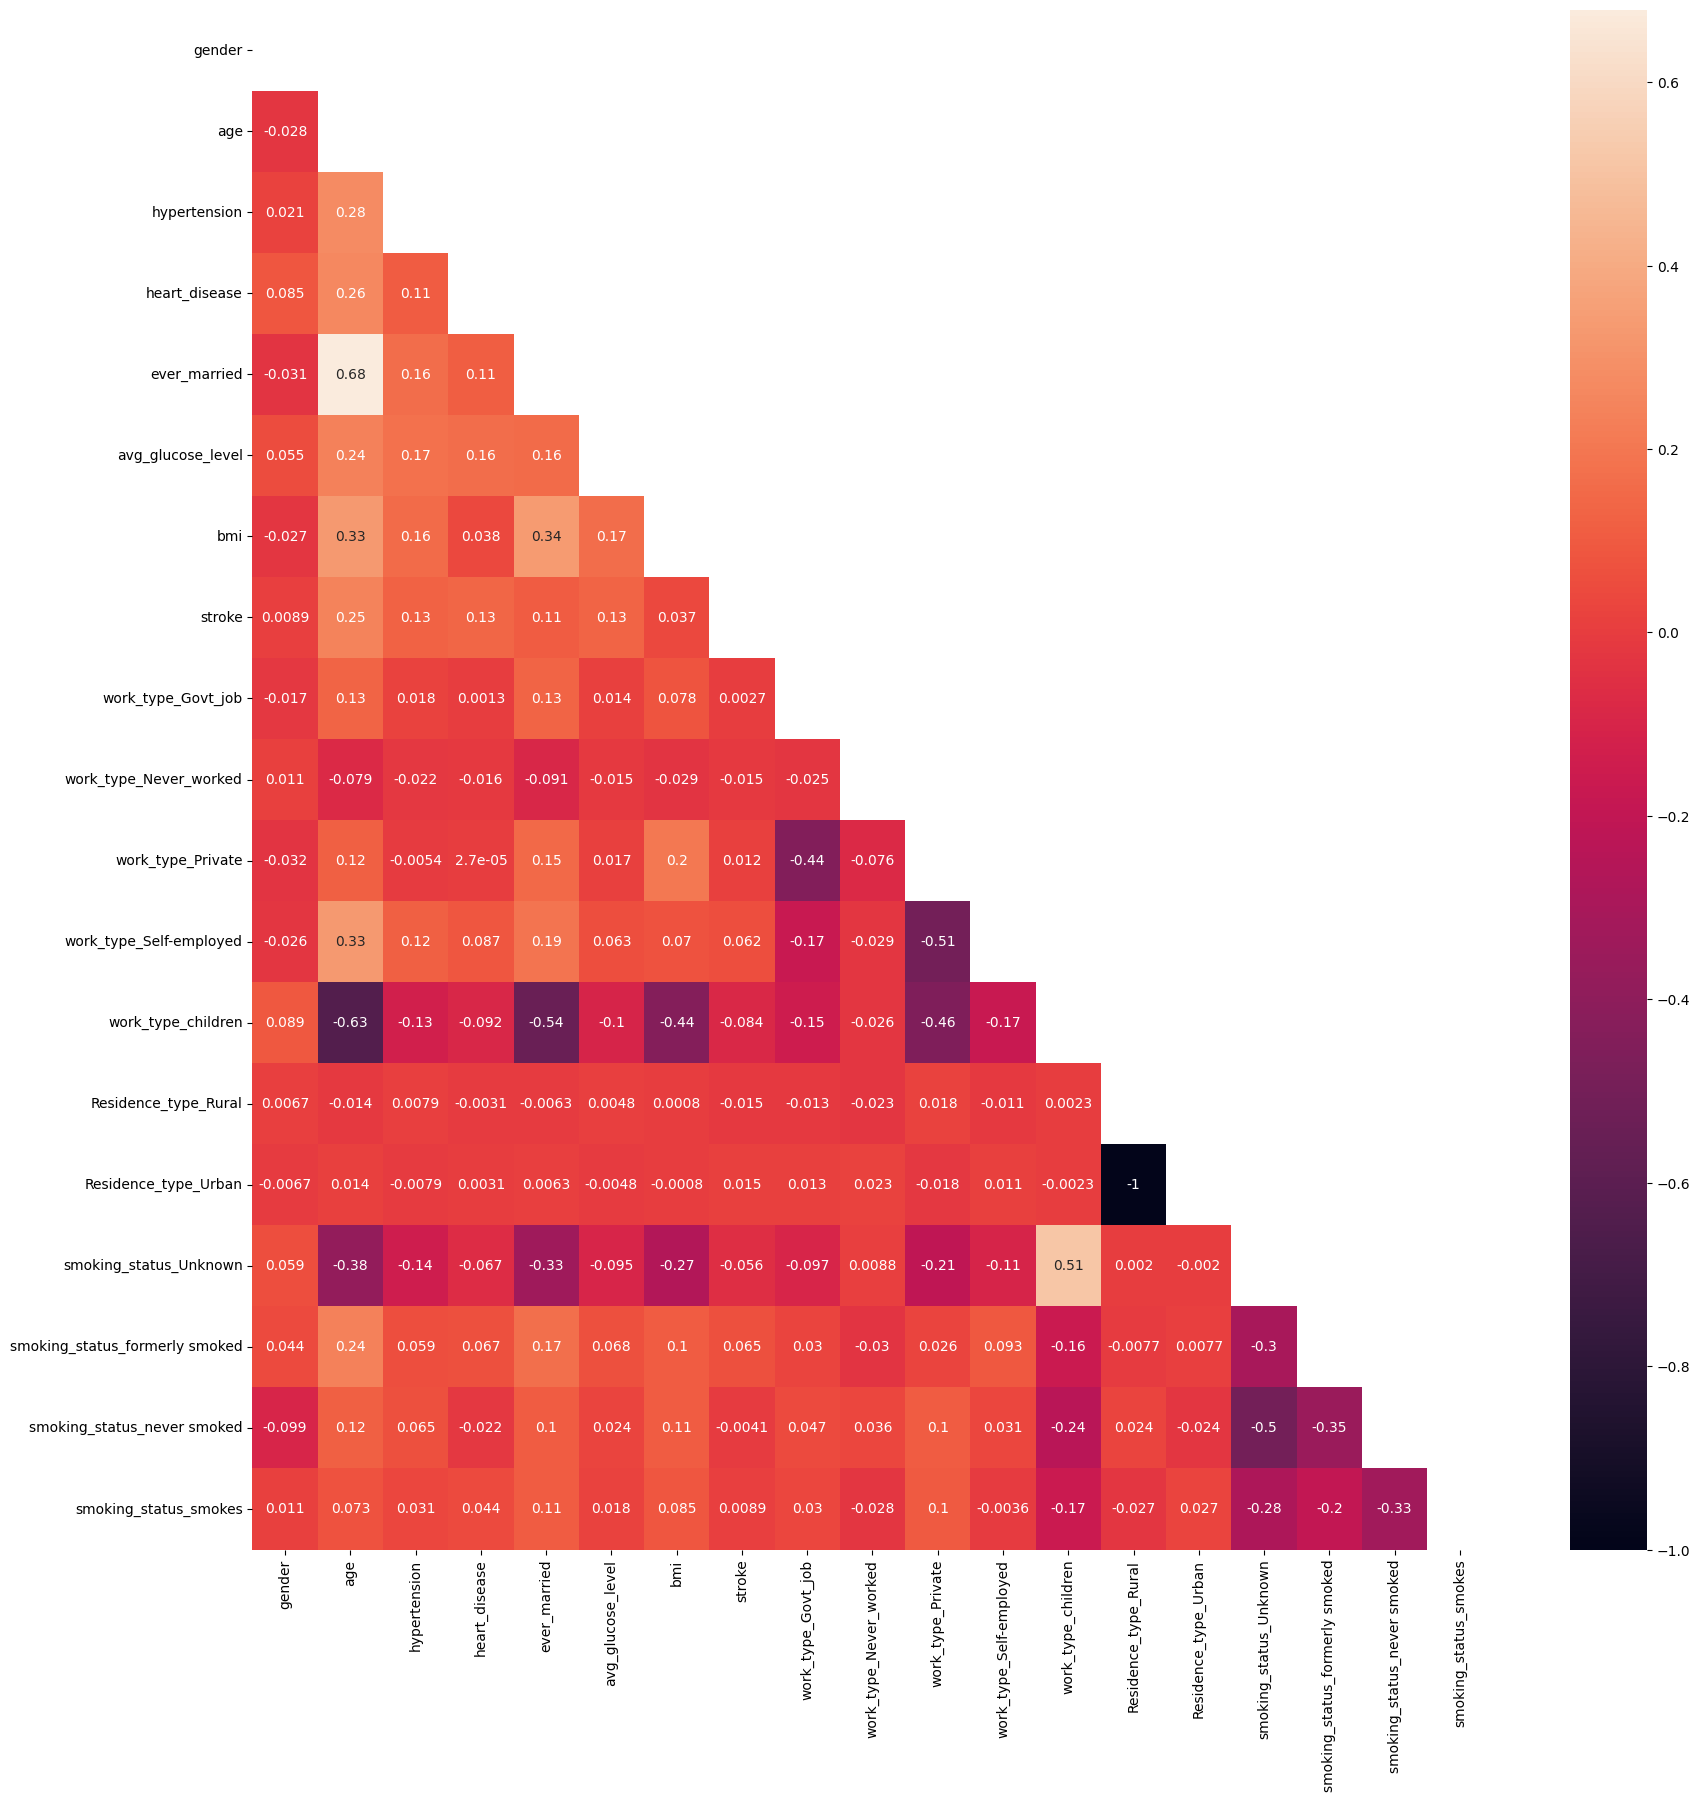

In [ ]:
corr=Stroke.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,mask = np.triu(np.ones_like(corr, dtype=bool)))

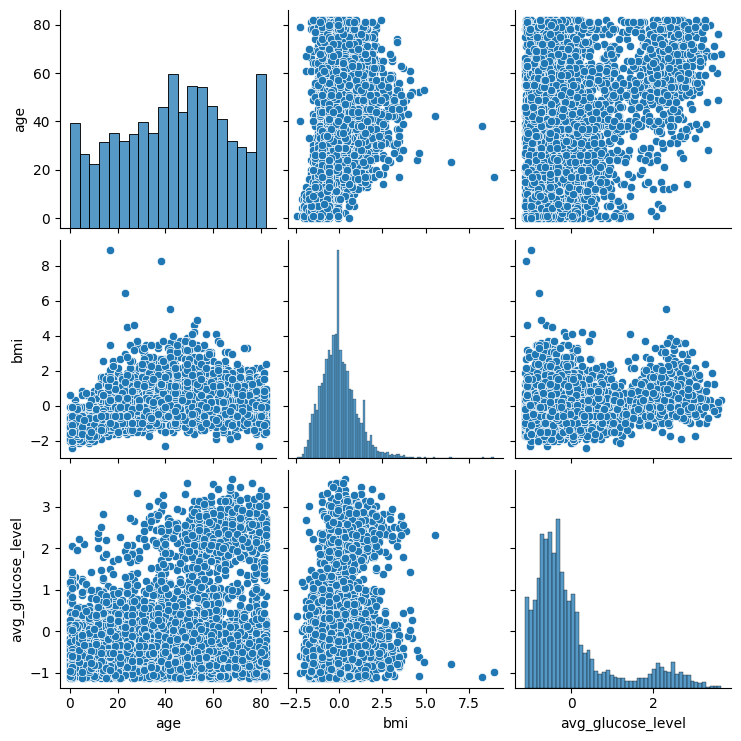

In [ ]:
scatter_data = Stroke[['age', 'bmi', 'avg_glucose_level']]
sns.pairplot(scatter_data)
plt.show()


In [ ]:
Stroke = Stroke.drop(['Residence_type_Rural','Residence_type_Urban','work_type_Never_worked','gender'], axis = 1)

In [ ]:
Stroke.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,1,2.702438,0.984566,1,0,1,0,0,0,1,0,0
1,61,0,0,1,2.128117,-0.056053,1,0,0,1,0,0,0,1,0
2,80,0,1,1,-0.014542,0.464257,1,0,1,0,0,0,0,1,0
3,49,0,0,1,1.443350,0.724412,1,0,1,0,0,0,0,0,1
4,79,1,0,1,1.509618,-0.576363,1,0,0,1,0,0,0,1,0


In [ ]:
result = run_classification_models(Stroke,'stroke')
print_results(result)

Model: KNN
Metrics:
Accuracy: 0.9511
Precision: 0.5000
Recall: 0.0400
F1 Score: 0.0741
Confusion Matrix:
[970   2]
[48  2]


Model: Random Forest
Metrics:
Accuracy: 0.9452
Precision: 0.1250
Recall: 0.0200
F1 Score: 0.0345
Confusion Matrix:
[965   7]
[49  1]


Model: Logistic Regression
Metrics:
Accuracy: 0.9521
Precision: 1.0000
Recall: 0.0200
F1 Score: 0.0392
Confusion Matrix:
[972   0]
[49  1]




In [ ]:
results = {}

for model, result in result.items():
    metrics_percentage = {}
    for metric, value in result['metrics'].items():
        if metric == 'Confusion Matrix':

            metrics_percentage[metric] = value
        else:

            metrics_percentage[metric] = value * 100

    results[model] = {'model': result['model'], 'metrics': metrics_percentage}

print(results)



{'KNN': {'model': KNeighborsClassifier(), 'metrics': {'Accuracy': 95.10763209393346, 'Precision': 50.0, 'Recall': 4.0, 'F1 Score': 7.4074074074074066, 'Confusion Matrix': array([[970,   2],
       [ 48,   2]])}}, 'Random Forest': {'model': RandomForestClassifier(), 'metrics': {'Accuracy': 94.52054794520548, 'Precision': 12.5, 'Recall': 2.0, 'F1 Score': 3.448275862068966, 'Confusion Matrix': array([[965,   7],
       [ 49,   1]])}}, 'Logistic Regression': {'model': LogisticRegression(max_iter=10000), 'metrics': {'Accuracy': 95.2054794520548, 'Precision': 100.0, 'Recall': 2.0, 'F1 Score': 3.9215686274509802, 'Confusion Matrix': array([[972,   0],
       [ 49,   1]])}}}


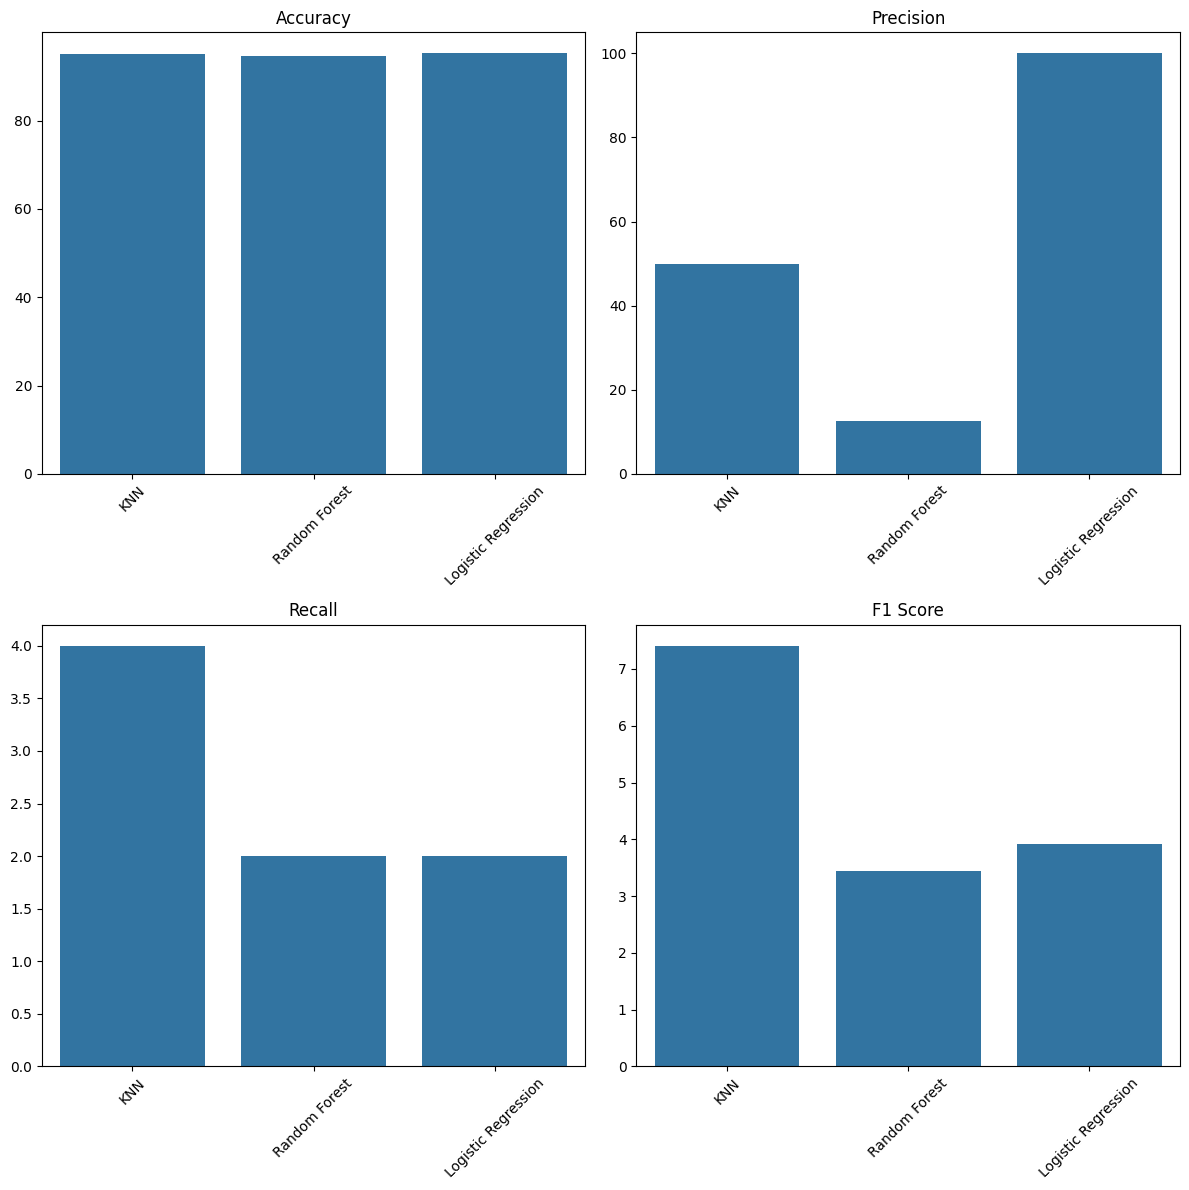

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(12, 12))
for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    sns.barplot(x=list(results.keys()), y=[results[model]['metrics'][metric] for model in results])
    plt.title(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

KNN Confusion Matrix:


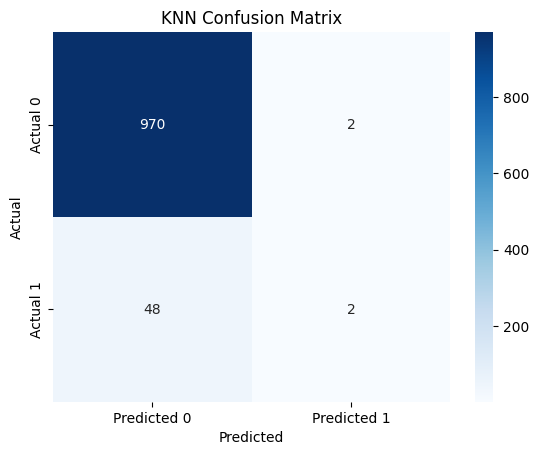



Random Forest Confusion Matrix:


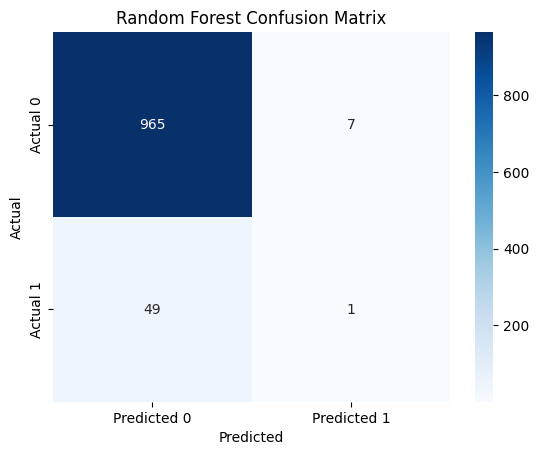



Logistic Regression Confusion Matrix:


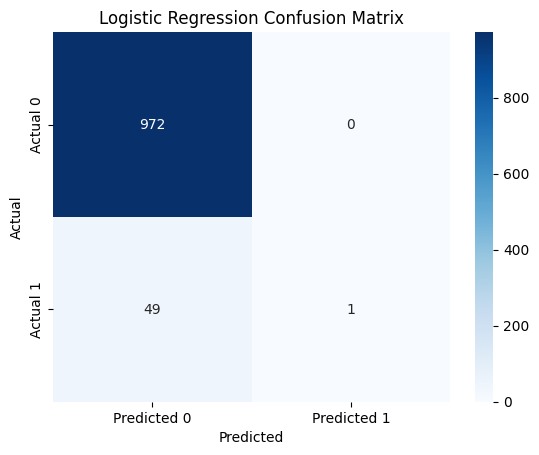

In [ ]:
for model, result in results.items():
    print(f'{model} Confusion Matrix:')
    df_confusion = pd.DataFrame(result['metrics']['Confusion Matrix'], index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    sns.heatmap(df_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model} Confusion Matrix')
    plt.show()
    print('\n')

In [ ]:

for model, result in results.items():
    print(f'{model} Report:')
    for metric, value in result['metrics'].items():
        if metric != 'Confusion Matrix':
            print(f'{metric}: {value}')
    print('\n')

KNN Report:
Accuracy: 95.10763209393346
Precision: 50.0
Recall: 4.0
F1 Score: 7.4074074074074066


Random Forest Report:
Accuracy: 94.52054794520548
Precision: 12.5
Recall: 2.0
F1 Score: 3.448275862068966


Logistic Regression Report:
Accuracy: 95.2054794520548
Precision: 100.0
Recall: 2.0
F1 Score: 3.9215686274509802


